Imports

In [146]:

import matplotlib.pyplot as plt
import numpy
plt.style.use('dark_background')

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from pandas import read_csv, DataFrame, DatetimeIndex

A bit of Data Organization for simplicity

In [34]:

data = read_csv("data/GlobalTemperatures.csv", header=0, index_col=0, parse_dates=True, date_format="%Y/%m/%d")

organized_data = DataFrame()
organized_data["year"] = DatetimeIndex(data.index).year
organized_data["month"] =  DatetimeIndex(data.index).month
organized_data["day"] =  DatetimeIndex(data.index).day
organized_data["LandAverageTemperature"] = data["LandAverageTemperature"].values
organized_data["LandMaxTemperature"] = data["LandMaxTemperature"].values
organized_data["LandMinTemperature"] = data["LandMinTemperature"].values

data = organized_data
data

,year,month,day,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
0,1750,1,1,3.034,NaN,NaN
1,1750,2,1,3.083,NaN,NaN
2,1750,3,1,5.626,NaN,NaN
3,1750,4,1,8.490,NaN,NaN
4,1750,5,1,11.573,NaN,NaN
...,...,...,...,...,...,...
3187,2015,8,1,14.755,20.699,9.005
3188,2015,9,1,12.999,18.845,7.199
3189,2015,10,1,10.801,16.450,5.232
3190,2015,11,1,7.433,12.892,2.157


Selecting data without to much uncertainty

In [37]:

data = data[data.year >= 1900]

Plotting Initial Data

<Axes: ylabel='Density'>

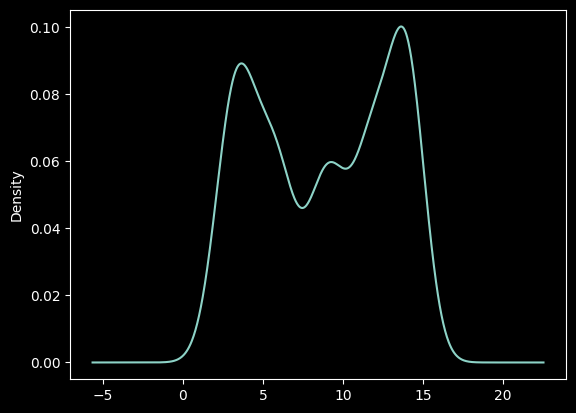

In [39]:
data.LandAverageTemperature.plot(kind="kde")

<Axes: ylabel='Density'>

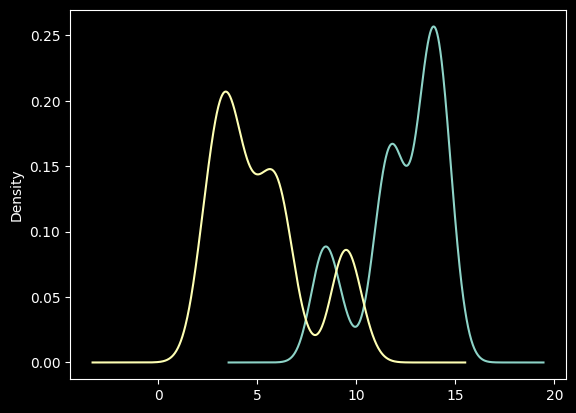

In [40]:
data[(data.month>=4) & (data.month<=9)].LandAverageTemperature.plot(kind="kde")

data[(data.month<4) | (data.month>9)].LandAverageTemperature.plot(kind="kde")

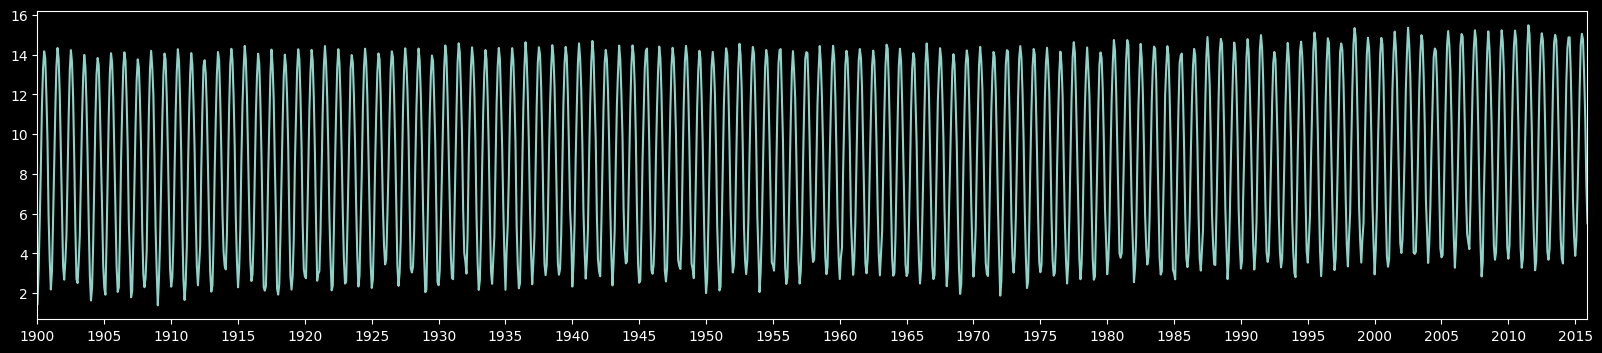

In [41]:
data_to_plot = data


values = data_to_plot.LandAverageTemperature.values
idx = numpy.linspace(1900, 2016, len(data_to_plot.index))

time_period = 12*5

tick_positions = idx[::time_period]
tick_values = list(map(lambda x:str(int(x)), idx[::time_period] ))

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

ax.set_xlim([1900, 2016])

ax.plot(idx, values)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_values)

plt.show()

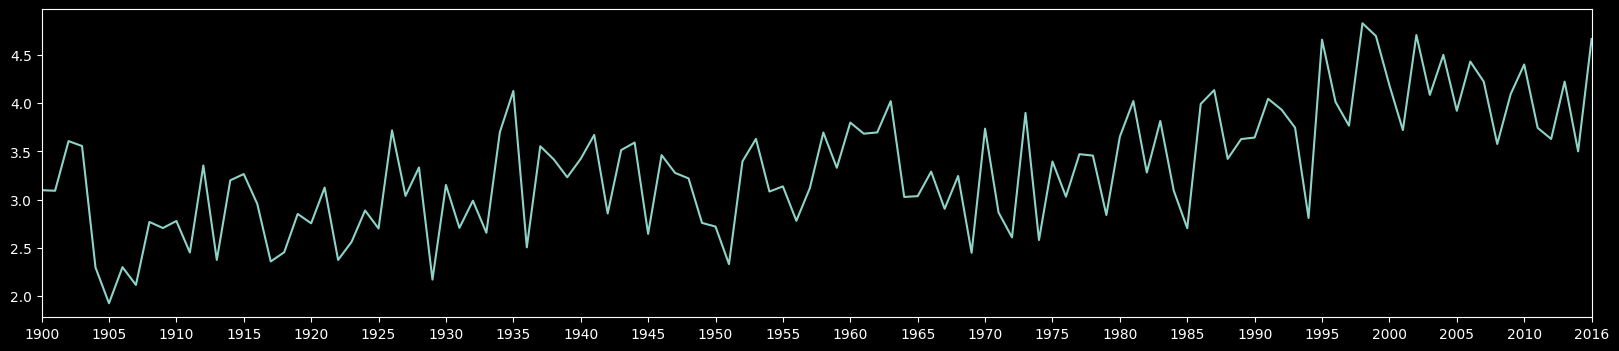

In [54]:
data_to_plot = data[data.month==2]

values = data_to_plot.LandAverageTemperature.values
idx = numpy.linspace(1900, 2016, len(data_to_plot.index))

time_period = 5

tick_positions = idx[::time_period]
tick_values = list(map(lambda x:str(int(x)), idx[::time_period] ))

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

ax.set_xlim([1900, 2016])

ax.plot(idx, values)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_values)

plt.show()

Plotting Autocorrilation (lag 30)

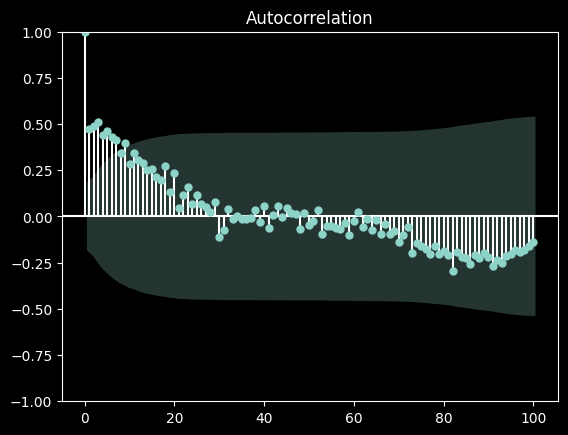

In [96]:
sm.graphics.tsa.plot_acf(data[data.month==2].LandAverageTemperature.values.squeeze(), lags=100)
plt.show()

Plotting Partial Autocorrilation (lag 50)

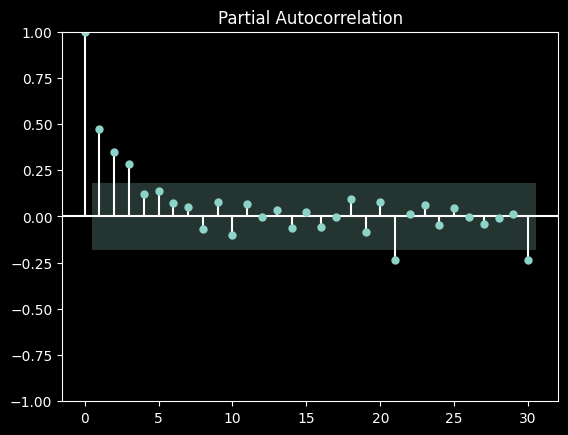

In [104]:
sm.graphics.tsa.plot_pacf(data[data.month==2].LandAverageTemperature.values.squeeze(), lags=30)
plt.show()

Splitting Data into Train and Test sets

In [75]:
size = 1970
train, test = data[(data.year<size) & (data.month==2)].LandAverageTemperature.values, data[(data.year>=size) & (data.month==2)].LandAverageTemperature.values

history = [x for x in train]
predictions = list()

Walk-forward validation

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,9))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

In [77]:
# evaluate forecasts
rmse = numpy.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.620


Plot Forecasts against Actual outcomes

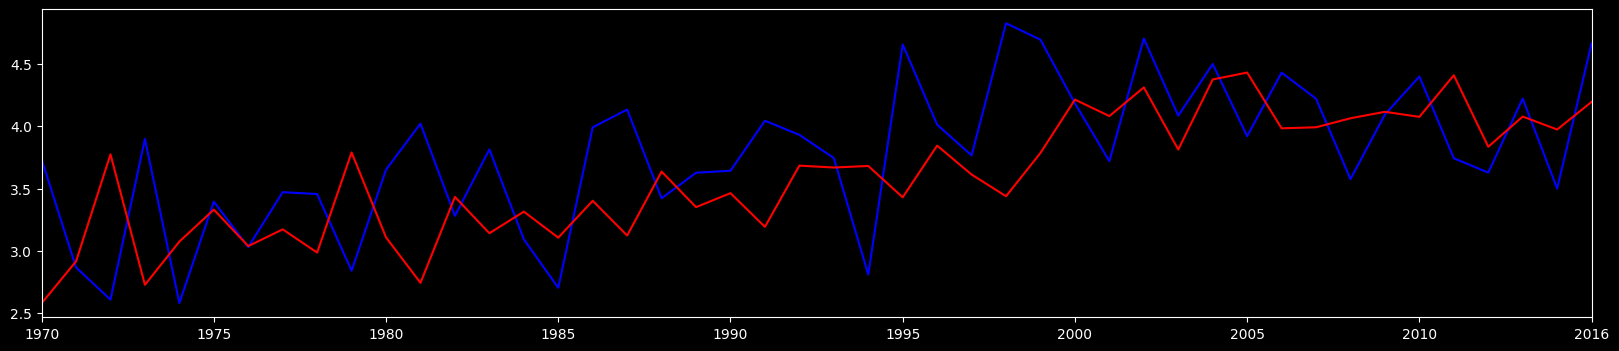

In [79]:

values = test
idx = numpy.linspace(size, 2016, len(test))

time_period = 5

tick_positions = idx[::time_period]
tick_values = list(map(lambda x:str(int(x)), idx[::time_period] ))

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

ax.set_xlim([size, 2016])

plt.plot(idx, test, color="blue")
plt.plot(idx, predictions, color='red')

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_values)

plt.show()

In [142]:
model = ARIMA(data.LandAverageTemperature.values, order=(10,1,10))
model_fit = model.fit()
output = model_fit.forecast(steps=12*10)

d:\ivanush\learning\Time Series Analisys\Practice\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\ivanush\learning\Time Series Analisys\Practice\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\ivanush\learning\Time Series Analisys\Practice\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


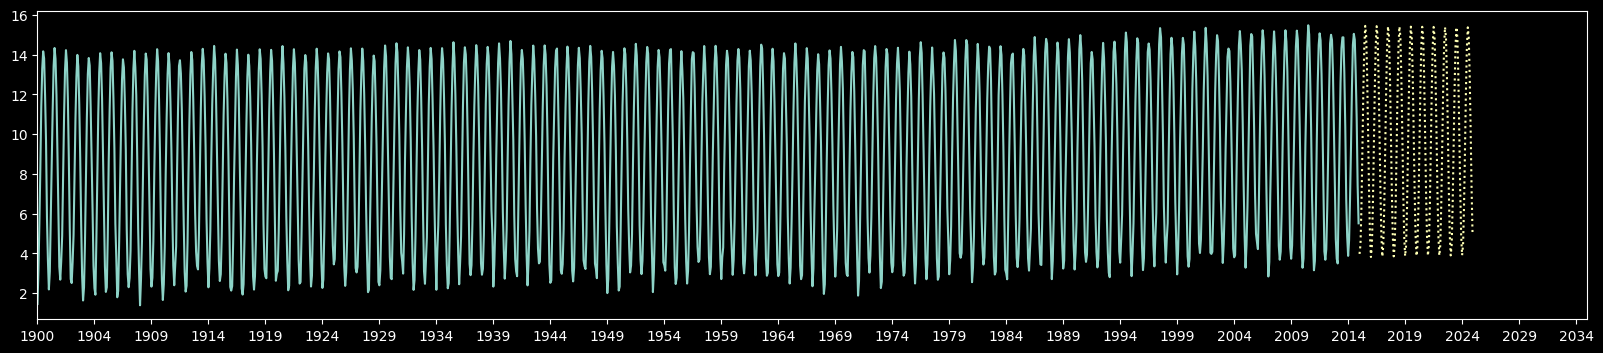

In [150]:
values1 = data.LandAverageTemperature.values
idx1 = numpy.arange(1900, 2016, 1/12)

values2 = output
idx2 = numpy.arange(2016, 2016+10, 1/12)



time_period = 12*5


fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(4)

ax.set_xlim([1900, 2016+20])

tick_positions = numpy.arange(1900, 2016+20, 1/12)[::time_period]
tick_values = list(map(lambda x:str(int(x)), numpy.arange(1900, 2016+20, 1/12)[::time_period] ))

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_values)


plt.plot(idx1, values1)
plt.plot(idx2, values2, ":")

plt.show()